In [1]:
# Do some imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import datetime

import sys
sys.path.append("D:/Edward/Documents/Assignments/Scripts/Python/generic")
from plots import SetFont # helps us fix some font problem for displaying Chinese characters

D:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [64]:
excelsheet_X_train = "./data/X序列_train.xls"
excelsheet_y_train =  "./data/Y序列_train.xls"

# Training data
X_train_original = pd.read_excel(excelsheet_X_train, "Sheet1", skiprows=[1])
y1_train = pd.read_excel(excelsheet_y_train, "Y1", header=None)
y2_train = pd.read_excel(excelsheet_y_train, "Y2", header=None)
y3_train = pd.read_excel(excelsheet_y_train, "Y3", header=None)

# Test data
excelsheet_X_train = "./data/X序列_test.xls"
X_test_original = pd.read_excel(excelsheet_X_train, "Sheet1", skiprows=[1])

In [62]:
X_train_original.describe()

,GDP:实际同比增长:全球,美国:GDP:现价:环比折年率:季调,欧元区:GDP平减指数:季调,全球商品贸易量增长率:出口金额:全球,工业增加值:当月同比,工业增加值:累计同比,固定资产投资完成额:累计同比,房地产开发投资完成额:累计同比,产量:发电量:当月同比,产量:发电量:累计同比,...,市净率:中证200,滚动市盈率(TTM):沪深两市,滚动市盈率(TTM):深圳市场,滚动市盈率(TTM):深市主板,滚动市盈率(TTM):中小板,滚动市盈率(TTM):创业板,中债总指数,中债国债总指数,中债金融债券总指数,中债信用债总指数
count,36.000000,275.000000,84.000000,20.000000,312.000000,210.000000,261.000000,187.000000,251.000000,311.000000,...,3273.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,3502.000000,3502.000000,3502.000000,2248.000000
mean,3.517139,6.588000,92.173143,5.100000,12.758590,12.716571,24.687356,24.162567,8.636828,9.025223,...,3.223309,15.913327,29.539789,21.149058,35.858248,54.809419,125.261976,124.936082,126.800902,119.904897
std,1.248717,4.746882,9.065830,5.374403,5.479889,4.431903,11.468376,9.269454,6.915276,5.479765,...,1.335584,4.276788,9.118093,4.954066,11.299075,22.798515,17.983413,18.305711,17.451678,15.502401
min,0.013000,-7.700000,77.300000,-12.000000,-21.100000,-2.930000,5.500000,1.000000,-13.700000,-11.800000,...,1.601100,11.690000,18.970000,15.720000,21.770000,27.090000,99.771300,97.860100,99.338200,97.377500
25%,2.719000,4.200000,83.047000,2.875000,9.200000,9.400000,17.300000,19.600000,4.800000,5.560000,...,2.196900,13.020000,24.080000,17.840000,28.280000,37.607500,109.332775,108.730825,111.480550,109.335050
50%,3.497500,6.100000,92.497500,5.250000,12.650000,11.650000,24.500000,24.300000,8.310000,9.040000,...,2.972400,14.165000,25.955000,19.370000,31.990000,49.020000,127.947800,127.369550,128.846600,115.906500
75%,4.188750,8.850000,100.235500,8.625000,16.100000,16.475000,29.500000,31.200000,13.500000,12.600000,...,3.697400,17.930000,31.087500,23.792500,37.962500,61.940000,139.943875,140.425800,140.846175,130.304275
max,5.673000,26.800000,106.491000,14.000000,29.400000,29.200000,65.500000,57.100000,36.462500,36.462500,...,8.098700,33.100000,68.350000,42.050000,84.110000,147.060000,167.752800,167.477800,169.529000,154.893300


In [3]:
X_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7764 entries, 0 to 7763
Data columns (total 45 columns):
指标名称                  7764 non-null datetime64[ns]
GDP:实际同比增长:全球         36 non-null float64
美国:GDP:现价:环比折年率:季调    275 non-null float64
欧元区:GDP平减指数:季调        84 non-null float64
全球商品贸易量增长率:出口金额:全球    20 non-null float64
工业增加值:当月同比            312 non-null float64
工业增加值:累计同比            210 non-null float64
固定资产投资完成额:累计同比        261 non-null float64
房地产开发投资完成额:累计同比       187 non-null float64
产量:发电量:当月同比           251 non-null float64
产量:发电量:累计同比           311 non-null float64
M0:同比                 257 non-null float64
M1:同比                 250 non-null float64
M2:同比                 250 non-null float64
中债国债到期收益率:3个月         3494 non-null float64
中债国债到期收益率:1个月         3493 non-null float64
中债国债到期收益率:1年          3494 non-null float64
中债国债到期收益率:5年          3494 non-null float64
中债国债到期收益率:10年         3494 non-null float64
CPI:当月同比              312 non-null float64
PPI:全部工业品:当月同比        2

In [22]:
print(X_train_original.shape)
print(y1_train.shape)

# not the same size. Need to split the data

(7764, 45)
(3392, 2)


In [5]:
X_train_original.columns

Index(['指标名称', 'GDP:实际同比增长:全球', '美国:GDP:现价:环比折年率:季调', '欧元区:GDP平减指数:季调',
       '全球商品贸易量增长率:出口金额:全球', '工业增加值:当月同比', '工业增加值:累计同比', '固定资产投资完成额:累计同比',
       '房地产开发投资完成额:累计同比', '产量:发电量:当月同比', '产量:发电量:累计同比', 'M0:同比', 'M1:同比',
       'M2:同比', '中债国债到期收益率:3个月', '中债国债到期收益率:1个月', '中债国债到期收益率:1年',
       '中债国债到期收益率:5年', '中债国债到期收益率:10年', 'CPI:当月同比', 'PPI:全部工业品:当月同比',
       'PPI:全部工业品:累计同比', 'RPI:当月同比', 'RPI:累计同比', '上证综合指数', '沪深300指数', '上证50指数',
       '中证500指数', '恒生AH股溢价指数', '国泰君安个人投资者投资景气指数', '市盈率:沪深300', '市盈率:中证100',
       '市盈率:中证200', '市净率:沪深300', '市净率:中证100', '市净率:中证200', '滚动市盈率(TTM):沪深两市',
       '滚动市盈率(TTM):深圳市场', '滚动市盈率(TTM):深市主板', '滚动市盈率(TTM):中小板',
       '滚动市盈率(TTM):创业板', '中债总指数', '中债国债总指数', '中债金融债券总指数', '中债信用债总指数'],
      dtype='object')

In [6]:
display(X_train_original.head())
display(X_train_original.tail())

,指标名称,GDP:实际同比增长:全球,美国:GDP:现价:环比折年率:季调,欧元区:GDP平减指数:季调,全球商品贸易量增长率:出口金额:全球,工业增加值:当月同比,工业增加值:累计同比,固定资产投资完成额:累计同比,房地产开发投资完成额:累计同比,产量:发电量:当月同比,...,市净率:中证200,滚动市盈率(TTM):沪深两市,滚动市盈率(TTM):深圳市场,滚动市盈率(TTM):深市主板,滚动市盈率(TTM):中小板,滚动市盈率(TTM):创业板,中债总指数,中债国债总指数,中债金融债券总指数,中债信用债总指数
0,1947-06-30,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-09-30,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-12-31,NaN,17.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-03-31,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1948-06-30,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,指标名称,GDP:实际同比增长:全球,美国:GDP:现价:环比折年率:季调,欧元区:GDP平减指数:季调,全球商品贸易量增长率:出口金额:全球,工业增加值:当月同比,工业增加值:累计同比,固定资产投资完成额:累计同比,房地产开发投资完成额:累计同比,产量:发电量:当月同比,...,市净率:中证200,滚动市盈率(TTM):沪深两市,滚动市盈率(TTM):深圳市场,滚动市盈率(TTM):深市主板,滚动市盈率(TTM):中小板,滚动市盈率(TTM):创业板,中债总指数,中债国债总指数,中债金融债券总指数,中债信用债总指数
7759,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7760,2015-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9855,22.75,44.89,26.14,54.99,91.62,167.7263,167.4778,169.4162,154.7450
7761,2015-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0084,23.08,45.99,26.45,57.46,92.36,167.7528,167.4174,169.5290,154.8247
7762,2015-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9765,23.26,46.64,27.00,57.98,93.77,167.7114,167.4101,169.4554,154.8933
7763,2015-12-31,3.398,1.3,106.491,NaN,5.9,6.1,10.0,1.0,-3.7,...,2.9336,22.96,45.80,26.55,57.00,91.50,167.7430,167.4459,169.4835,154.8913


In [25]:
print(X_train_original['指标名称'][0])
print(y1_train.iloc[:,0][0])

1947-06-30 00:00:00
2002-01-04 00:00:00


In [3]:
X_train_original["IsInY1"] = np.nan
X_train_original["IsInY2"] = np.nan
X_train_original["IsInY3"] = np.nan

for i in X_train_original.index:
    Current_Index = X_train_original.loc[i, '指标名称']
    X_train_original.loc[i, "IsInY1"] = np.any(y1_train.iloc[:, 0] == X_train_original.iloc[i,0])
    X_train_original.loc[i, "IsInY2"] = np.any(y2_train.iloc[:, 0] == X_train_original.iloc[i,0])
    X_train_original.loc[i, "IsInY3"] = np.any(y3_train.iloc[:, 0] == X_train_original.iloc[i,0])

In [67]:
print("Y1", int(X_train_original["IsInY1"].values.astype("int").sum()), "/", X_train_original.shape[0])
print("Y2", int(X_train_original["IsInY2"].values.astype("int").sum()), "/", X_train_original.shape[0])
print("Y3", int(X_train_original["IsInY3"].values.astype("int").sum()), "/", X_train_original.shape[0])

Y1 3392 / 7764
Y2 3494 / 7764
Y3 2822 / 7764


### Look at only Y1 now
Make `X1_train`

In [4]:
# Drop some rows
X1_train = X_train_original.drop(np.where(np.logical_not(X_train_original.loc[:, "IsInY1"]))[0], axis=0)

In [5]:
# Find out which columns only have NaNs: Count number of NaNs in each column
#print(X1_train.isnull().sum())

# Drop anything that has greater than 100 NaNs
count_NaNs = X1_train.isnull().sum()
drop_columns = count_NaNs.loc[count_NaNs >100].index
X1_train = X1_train.drop(drop_columns, axis=1)

In [6]:
# Fill the NaNs
X1_train = X1_train.fillna(method='ffill')

In [102]:
print(X1_train.shape)
print(y1_train.shape)
np.all([x == y for x, y in zip(X1_train.iloc[:,0],y1_train.iloc[:,0])]) # there is 1 to 1 correpsondence in X1_train, y1_train

(3392, 14)
(3392, 2)


True

In [41]:
# Save cleaned data
X1_train.drop(["IsInY1","IsInY2","IsInY3"], inplace=True, axis=1)
X1_train.to_csv("./data/Cleaned_X1_序列_train.csv", index=False, encoding='utf-8')

In [3]:
# Load data for next session
X1_train = pd.read_csv("./data/Cleaned_X1_序列_train.csv", encoding="utf", engine='python')
headers = [u'指标名称', u'中债国债到期收益率:3个月', u'中债国债到期收益率:1个月', u'中债国债到期收益率:1年',
       u'中债国债到期收益率:5年', u'中债国债到期收益率:10年', u'上证综合指数', u'沪深300指数', u'中债总指数',
       u'中债国债总指数', u'中债金融债券总指数']

[ 1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 17.]


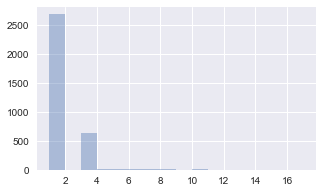

In [141]:
# Find out if dates are even 
dates = np.asarray([matplotlib.dates.date2num(i.date()) for i in X1_train["指标名称"]]) # convert to num first

intervals = np.diff(dates)
print(np.unique(intervals)) # dates are not even intervals. Most of the data is continuous
fig = plt.figure(figsize=(5,3))
sns.distplot(intervals, kde=False, bins = np.unique(intervals))
plt.show()

In [4]:
# Combine data for ease of plotting
df = X1_train.copy()
df["Y"] = y1_train.iloc[:, 1]

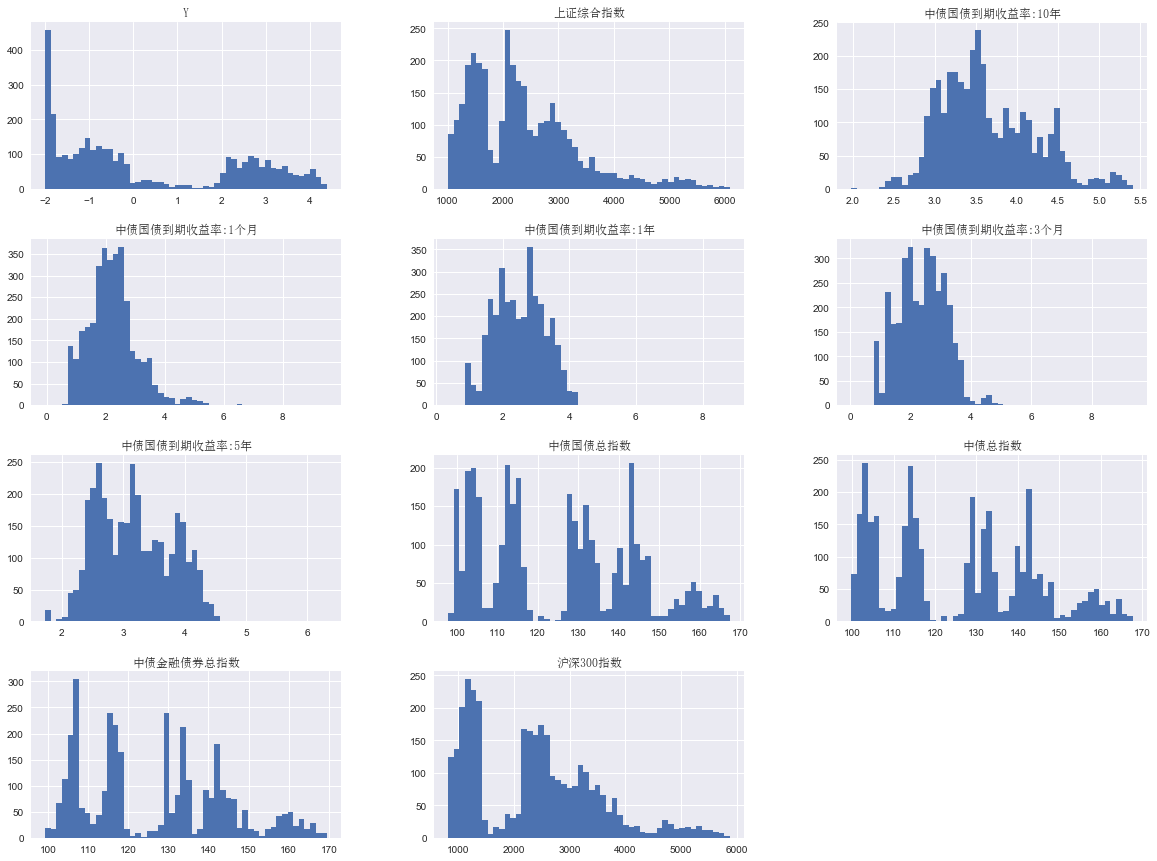

In [44]:
# Do some histogram plots for the features
df.hist(bins=50, figsize=(20,15))
# Fix some font issues with Chinese titles in pandas
SetFont(axes, plt.gcf(), fontsize=8, fontname='c:\\windows\\fonts\\simsun.ttc', items=["title"])
[ax.set_title(ax.get_title(), fontproperties=fontprop) for ax in plt.gcf().axes]
plt.show()

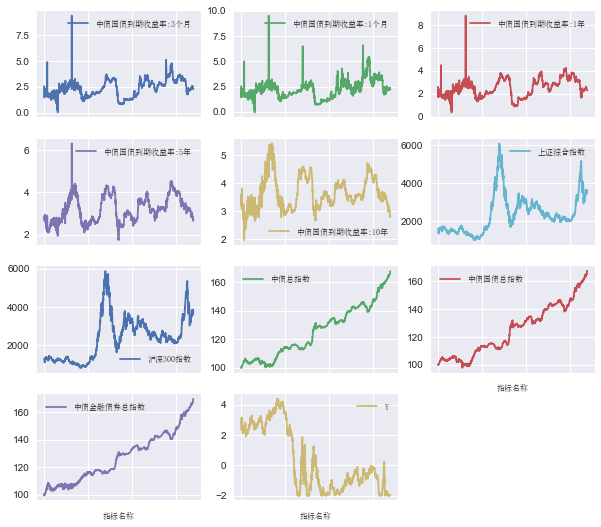

In [48]:
# Plot as time series
axes= df.plot(x="指标名称", kind='line', subplots=True, grid=True, layout=(4, 3), figsize=(10,10))
SetFont(axes, plt.gcf(), fontsize=8, fontname='c:\\windows\\fonts\\simsun.ttc', items=["legend", "xlab"])
plt.show()

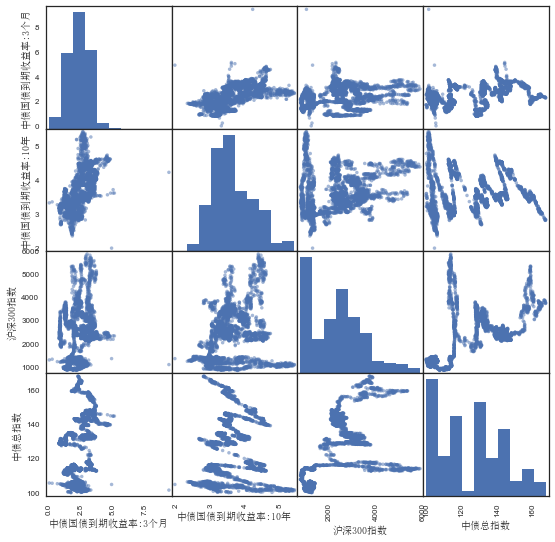

In [10]:
# A lot of features seems to be higly correlated. Do a correlation matrix
from pandas.plotting import scatter_matrix
sns.set_style(style="white", rc=None)
# do correlation those columns
headers = [u'中债国债到期收益率:3个月',u'中债国债到期收益率:10年', u'沪深300指数', u'中债总指数']
axes= scatter_matrix(df[headers], figsize=(9,9))
SetFont(axes, plt.gcf(), fontsize=10, fontname='c:\\windows\\fonts\\simsun.ttc', items=["ylab", "xlab"])

plt.show()

### Ideas for forecasting this time series with 4 selected features
* Can also do dimensionality reduction on the 10 features and select the first 4 PCs to train (perhaps for later)
* Simple ARIMA model for forecasting
* XGBoost with regression
* Deep neural network using RNN / (GRD / LSTM)

### XGBoost regression

In [38]:
# Taking only these features
headers = [u'中债国债到期收益率:3个月',u'中债国债到期收益率:10年', u'沪深300指数', u'中债总指数']
df_sub = df[headers]
X1_train_mat = np.asarray(df_sub)
y1_train_mat = np.asarray(df["Y"])

In [45]:
# Separating data into X_train, y_train, X_val, y_val
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=50) # for 10 folds of crossvalidation

In [48]:
# Start with a simple xgboost, ignoring the time information and see what it does
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
accuracy_scores_list = []
xgb_reg = XGBRegressor()
for epoch, (train_index, test_index) in enumerate(tscv.split(X1_train_mat)):
    # Get data
    X_train, X_test = X1_train_mat[train_index], X1_train_mat[test_index]
    y_train, y_test = y1_train_mat[train_index], y1_train_mat[test_index]
    # Train the XGBoost
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    acs = np.sqrt(mean_squared_error(y_test, y_pred))
    #print("RMSE:", acs)
    accuracy_scores_list.append(acs)

print(accuracy_scores_list)

[0.05574110536573941, 0.016619024135980067, 0.033881089297445995, 0.013101490564228898, 0.007774167837661698, 0.008569569113488041, 0.005166861410345484, 0.007832514961462039, 0.10005812582163125, 0.058317227561839116, 0.2211929768332808, 0.014995624191141943, 0.008868785821808294, 0.008205008667429285, 0.00576499377245283, 0.00802906259572069, 1.2052946434474727, 0.8126311930967228, 0.15654579347225767, 1.750743392239421, 0.044947404216504394, 0.21488408349684798, 0.2582022184042565, 0.042088168768110695, 0.026614885513594116, 0.01723346169905295, 0.008961623272351706, 0.005099523525062128, 0.00442548052878379, 0.017016211342525782, 0.009355822744739896, 0.0065087937224623344, 0.004312519221825024, 0.013912412268863143, 0.01962128467142125, 0.02687753017935029, 0.019629388004812065, 0.01798221459584771, 0.015101587288185747, 0.01878468314918182, 0.017443180140183975, 0.019159339317003296, 0.018499472288233895, 0.02056343811438474, 0.012219307694427372, 0.016117898906048884, 0.00483214

In [110]:
np.mean(accuracy_scores_list)

0.1089862479122226

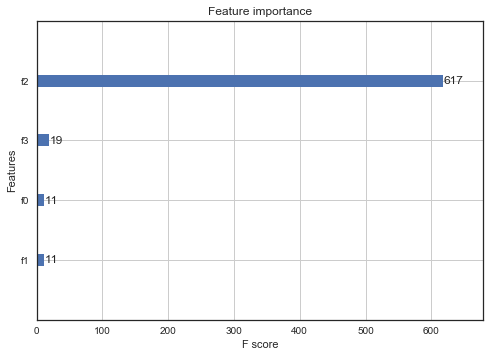

In [51]:
import xgboost as xgb
xgb.plot_importance(xgb_reg)
plt.show()

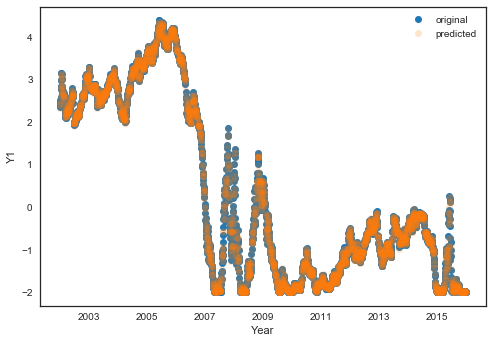

In [59]:
# Plot prediction vs. actual data
y1_pred_all = xgb_reg.predict(X1_train_mat)

plt.plot_date(X1_train[u'指标名称'], y1_train_mat, color='#1f77b4', label="original")
plt.plot_date(X1_train[u'指标名称'], y_pred_all, color='#ff7f0e', label="predicted", alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Y1")
plt.legend()
plt.show()

In [70]:
# Make predictions using the trained XGBoost Regressor
X1_test = X_test_original[[u'指标名称'] + headers]
X1_test.isnull().sum()
# has some missing data. Need to later fit with spline

指标名称               0
中债国债到期收益率:3个月    259
中债国债到期收益率:10年    259
沪深300指数          275
中债总指数            260
dtype: int64

In [84]:
# Fit the features with spline
X1_test_filled = X1_test.copy()
X1_test_filled[headers] = X1_test_filled[headers].interpolate(method="cubic", axis=0)

X1_test_filled[headers] =X1_test_filled[headers].fillna(axis=0, method="bfill")
X1_test_filled[headers] =X1_test_filled[headers].fillna(axis=0, method="ffill")

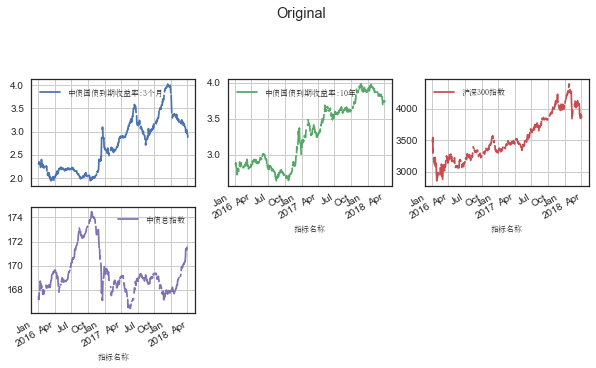

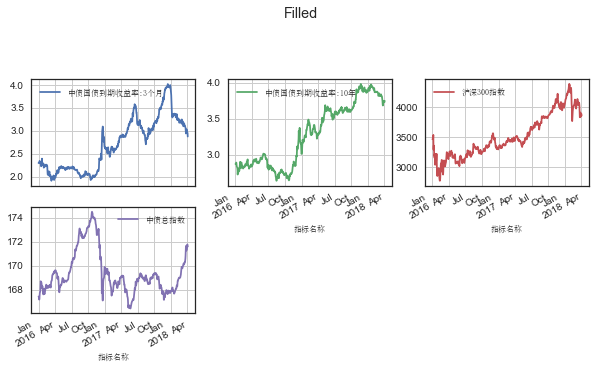

In [87]:
# Plot as time series
axes= X1_test.plot(x="指标名称", kind='line', subplots=True, grid=True, layout=(4, 3), figsize=(10,10))
SetFont(axes, plt.gcf(), fontsize=8, fontname='c:\\windows\\fonts\\simsun.ttc', items=["legend", "xlab"])
plt.suptitle("Original")
plt.show()

axes= X1_test_filled.plot(x="指标名称", kind='line', subplots=True, grid=True, layout=(4, 3), figsize=(10,10))
SetFont(axes, plt.gcf(), fontsize=8, fontname='c:\\windows\\fonts\\simsun.ttc', items=["legend", "xlab"])
plt.suptitle("Filled")
plt.show()

In [96]:
X1_test_filled_mat = np.asarray(X1_test_filled[headers])
Y1_pred = xgb_reg.predict(X1_test_filled_mat)

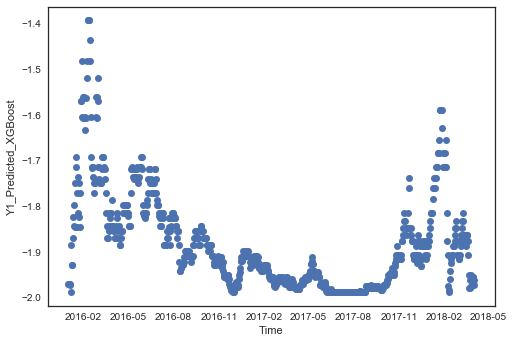

In [109]:
plt.plot_date(X1_test_filled["指标名称"], Y1_pred)
plt.xlabel("Time")
plt.ylabel("Y1_Predicted_XGBoost")
plt.savefig("./results/Y1_prediction_XGBoostReg.png", bbox_inches='tight', dpi=300)
plt.show()

In [98]:
# Writing the Y1 prediction to csv
Y1_pred_df = pd.DataFrame({"Date":X1_test_filled["指标名称"], "Y1":Y1_pred})
Y1_pred_df.to_csv("./results/Y1_prediction_XGBoostReg.csv", index=False, sep="\t")

In [112]:
# save the model
import pickle
pickle.dump(xgb_reg, open("./results/XGBoostReg_y1.model", "wb"))

#loaded_model = pickle.load(open("./results/XGBoostReg_y1.model", "rb"))